## Decision Tree Classifier

### Bagging
**Bagging attempts to reduce the chance overfitting complex models.**
* It trains a large number of "strong" learners in parallel.
* A strong learner is a model that's relatively unconstrained.
* Bagging then combines all the strong learners together in order to "smooth out" their predictions.

### Boosting
**Boosting attempts to improve the predictive flexibility of simple models.**
* It trains a large number of "weak" learners in sequence.
* A weak learner is a constrained model (i.e., you could limit the max depth of each decision tree).
* Each one in the sequence focuses on learning from the mistakes of the one before it.
* Boosting then combines all the weak learners into a single strong learner.

### Random Forest Classifcation Trees
**Random forests train a large number of “strong” decision trees and combine their predictions through bagging. In addition, there are two sources of “randomness” for random forests:**
* Each tree is only allowed to choose from a random subset of features to split on (leading to feature selection).
* Each tree is only trained on a random subset of observations (a process called resampling).
* In practice, random forests tend to perform very well right out of the box. They often beat many other models that take up to weeks to develop. They don’t have many complicated parameters to tune, making them the perfect “swiss-army-knife” algorithm that almost always gets good results.

### Boosted Trees
**Boosted trees train a sequence of “weak”, constrained decision trees and combine their predictions through boosting.**
* Each tree is allowed a maximum depth, which should be tuned.
* Each tree in the sequence tries to correct the prediction errors of the one before it.
* In practice, boosted trees tend to have the highest performance ceilings. They often beat many other types of models after proper tuning, but they are more complicated to tune than random forests.

<b>Reading Data</b>

In [1]:
# Read data from 
import pandas as pd
binary = pd.read_csv('E:\datafile\dt_data.csv')
binary.head()

,Card_Cust_ID,Gender,Education_level,Unnamed: 3,Last_Month_spend,Last_3m_avg_spend,Spend_Drop_over50pct
0,1000001,F,University,NaN,160,200,1
1,1000002,F,University,NaN,250,190,0
2,1000003,F,University,NaN,470,530,0
3,1000004,F,University,NaN,830,800,0
4,1000005,M,University,NaN,750,480,0


<b>Explore Data</b>

In [2]:
# Describe a data frame in Python - summary statistics of all the variables
binary.describe()

,Card_Cust_ID,Unnamed: 3,Last_Month_spend,Last_3m_avg_spend,Spend_Drop_over50pct
count,4.750000e+02,0.0,475.000000,475.000000,475.000000
mean,1.002555e+06,NaN,602.147368,602.042105,0.263158
std,4.481438e+03,NaN,343.098348,343.130657,0.440812
min,1.000001e+06,NaN,10.000000,10.000000,0.000000
25%,1.000130e+06,NaN,310.000000,305.000000,0.000000
50%,1.000253e+06,NaN,600.000000,600.000000,0.000000
75%,1.000382e+06,NaN,900.000000,900.000000,1.000000
max,1.011114e+06,NaN,1190.000000,1200.000000,1.000000


In [3]:
# Columns
binary.dtypes.index

Index(['Card_Cust_ID', 'Gender', 'Education_level', 'Unnamed: 3',
       'Last_Month_spend', 'Last_3m_avg_spend', 'Spend_Drop_over50pct'],
      dtype='object')

In [4]:
# Drop a column
binary.drop('Unnamed: 3', axis=1, inplace=True)

binary.dtypes.index

Index(['Card_Cust_ID', 'Gender', 'Education_level', 'Last_Month_spend',
       'Last_3m_avg_spend', 'Spend_Drop_over50pct'],
      dtype='object')

In [5]:
binary.head()

,Card_Cust_ID,Gender,Education_level,Last_Month_spend,Last_3m_avg_spend,Spend_Drop_over50pct
0,1000001,F,University,160,200,1
1,1000002,F,University,250,190,0
2,1000003,F,University,470,530,0
3,1000004,F,University,830,800,0
4,1000005,M,University,750,480,0


In [6]:
# Target Variable to be made {-1, 1}
binary.Spend_Drop_over50pct.replace([0, 1], ['A', 'B'], inplace=True)
 
# Print a few rows
binary.head()

,Card_Cust_ID,Gender,Education_level,Last_Month_spend,Last_3m_avg_spend,Spend_Drop_over50pct
0,1000001,F,University,160,200,B
1,1000002,F,University,250,190,A
2,1000003,F,University,470,530,A
3,1000004,F,University,830,800,A
4,1000005,M,University,750,480,A


In [7]:
# Count Target Variable Values
binary.Spend_Drop_over50pct.value_counts()

A    350
B    125
Name: Spend_Drop_over50pct, dtype: int64

In [8]:
# Find % Values of Target Variable Levels
round(binary.Spend_Drop_over50pct.value_counts()*100/len(binary.axes[0]),2)

A    73.68
B    26.32
Name: Spend_Drop_over50pct, dtype: float64

In [9]:
len(binary.axes[0])

475

<b>Test and Train Sample</b>

Now, we have a data sample, which can be considered for the modeling. We are splitting the data into Test Sample (which will be used for validating the model developed) and Train Sample (which will be used for Model development).

In [10]:
# Split sample into Train and Test
from sklearn.model_selection import train_test_split
Train,Test = train_test_split(binary, test_size = 0.3, random_state = 176)

# Print a few rows
Train.head()

,Card_Cust_ID,Gender,Education_level,Last_Month_spend,Last_3m_avg_spend,Spend_Drop_over50pct
34,1000037,M,Graduate,20,30,B
335,1000361,M,University,790,780,A
439,1011077,M,High School,1190,1190,A
4,1000005,M,University,750,480,A
169,1000183,M,University,460,400,B


In [11]:
# Keep Target and Independent Variable into different array
Train_IndepentVars = Train.values[:, 3:5]
Train_TargetVar = Train.values[:,5]

In [12]:
Train_IndepentVars[:10]

array([[20, 30],
       [790, 780],
       [1190, 1190],
       [750, 480],
       [460, 400],
       [20, 380],
       [200, 70],
       [190, 120],
       [1090, 1080],
       [100, 170]], dtype=object)

In [13]:
Train_TargetVar[:20]

array(['B', 'A', 'A', 'A', 'B', 'B', 'A', 'A', 'A', 'B', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'B'], dtype=object)

In [14]:
print ("Total rows = ", len(Train_TargetVar))
print ("Total A-rows = ", (Train_TargetVar == 'A').sum())
print ("Total B-rows = ", (Train_TargetVar == 'B').sum())

Total rows =  332
Total A-rows =  243
Total B-rows =  89


We have arrays for independent variables and the target variable. 
We can now build decision tree classifier. 
We are using DecisionTreeClassifier from sklearn library.  
"gini" option helps in leveraging CART - 
Classification and Regression Tree - algorithm for fitting the decision tree.

In [15]:
# Load library
# from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# Building Decision Tree - CART Algorithm (gini criteria)
dt_train_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)
# Train
dt_train_gini.fit(Train_IndepentVars, Train_TargetVar)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

In [16]:
Test_new=Test.values[:,3:5]
pred_output=dt_train_gini.predict(Test_new)
pred_output

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'B', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'B', 'A',
       'A', 'A', 'B', 'A', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'A', 'A',
       'A', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A',
       'A', 'B', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'B', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'A',
       'A', 'B', 'A', 'B', 'A', 'A', 'A', 'A', 'B', 'B', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'A',
       'B', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'B', 'B', 'A',
       'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'B', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'A', 'B', 'A'],
      dtype=object)

In [17]:
print(dt_train_gini.predict_proba(Test_new)[:10])

[[0.51851852 0.48148148]
 [0.73684211 0.26315789]
 [0.93333333 0.06666667]
 [0.89830508 0.10169492]
 [0.88157895 0.11842105]
 [0.89830508 0.10169492]
 [0.51851852 0.48148148]
 [0.73333333 0.26666667]
 [0.89830508 0.10169492]
 [1.         0.        ]]


In [18]:
print(dt_train_gini.predict_proba(Test_new)[-10:])

[[0.88157895 0.11842105]
 [0.88157895 0.11842105]
 [0.         1.        ]
 [0.73333333 0.26666667]
 [0.         1.        ]
 [0.88157895 0.11842105]
 [0.73333333 0.26666667]
 [0.73684211 0.26315789]
 [0.3125     0.6875    ]
 [0.88157895 0.11842105]]


In [19]:
# constructing confusion matrix
actual_outputs = Test['Spend_Drop_over50pct']
pd.crosstab(actual_outputs, pred_output, rownames=['Actual Value'], colnames=['Predicted Values'])

Predicted Values,A,B
Actual Value,,
A,92,15
B,22,14


In [20]:
print (dt_train_gini.feature_importances_)

[0.62978053 0.37021947]


In [21]:
features = Train.columns[3:5]
print (features)
dict(list(zip(features, dt_train_gini.feature_importances_)))

Index(['Last_Month_spend', 'Last_3m_avg_spend'], dtype='object')


{'Last_Month_spend': 0.6297805290500129,
 'Last_3m_avg_spend': 0.37021947094998703}

In [22]:
import numpy as np
print("\tActual Value | Predicted Value")
arr = np.concatenate((np.array(actual_outputs).reshape(-1,1), np.array(pred_output).reshape(-1,1)), axis=1)
for i in range(len(arr)):
    print((i+1),"\t", end=" ")
    for j in range(2):
        print("  ",arr[i][j],"\t\t", end="")
    print()

	Actual Value | Predicted Value
1 	    A 		   A 		
2 	    A 		   A 		
3 	    B 		   A 		
4 	    A 		   A 		
5 	    A 		   A 		
6 	    A 		   A 		
7 	    A 		   A 		
8 	    B 		   A 		
9 	    A 		   A 		
10 	    A 		   A 		
11 	    A 		   A 		
12 	    A 		   A 		
13 	    B 		   A 		
14 	    A 		   A 		
15 	    A 		   B 		
16 	    B 		   A 		
17 	    A 		   A 		
18 	    A 		   A 		
19 	    B 		   B 		
20 	    A 		   A 		
21 	    A 		   A 		
22 	    A 		   A 		
23 	    A 		   A 		
24 	    B 		   A 		
25 	    B 		   B 		
26 	    A 		   A 		
27 	    B 		   A 		
28 	    A 		   A 		
29 	    B 		   B 		
30 	    A 		   A 		
31 	    A 		   A 		
32 	    B 		   A 		
33 	    B 		   B 		
34 	    A 		   A 		
35 	    A 		   B 		
36 	    A 		   A 		
37 	    A 		   A 		
38 	    A 		   A 		
39 	    A 		   A 		
40 	    B 		   A 		
41 	    A 		   A 		
42 	    B 		   B 		
43 	    A 		   A 		
44 	    A 		   A 		
45 	    B 		   A 		
46 	    B 		   A 		
47 	    A 		   A 		
48 	    A 		   B 		
49 	    A 		   A 

In [23]:
from sklearn.metrics import accuracy_score
print("The accuracy of the model : ",accuracy_score(actual_outputs, pred_output)*100,"%")

The accuracy of the model :  74.12587412587412 %


In [24]:
from sklearn.metrics import classification_report
target_names = ['A', 'B']
print(classification_report(actual_outputs, pred_output, target_names=target_names))

              precision    recall  f1-score   support

           A       0.81      0.86      0.83       107
           B       0.48      0.39      0.43        36

    accuracy                           0.74       143
   macro avg       0.64      0.62      0.63       143
weighted avg       0.73      0.74      0.73       143



<b>Decision Tree Visualization</b>

To see the decision tree plot we'll use graphviz.

In [25]:
from sklearn import tree
with open("dt_train_gini.txt", "w") as f:
    f = tree.export_graphviz(dt_train_gini, out_file=f)

This step create a text file dt_train_gini.txt in the default folder. We can give full path as well. We can copy the context of this text file and put into the box on http://www.webgraphviz.com/

Step 1:
pip install pydotplus

Step 2:
Download and install graphviz-2.50.0 (64-bit) EXE installer [sha256] (use the newest version) from https://graphviz.org/download/
Set the path variable
        (a) Control Panel > System and Security > System > Advanced System Settings > Environment Variables > Path > Edit
        (b) add 'C:\Program Files (x86)\Graphviz2.38\bin'

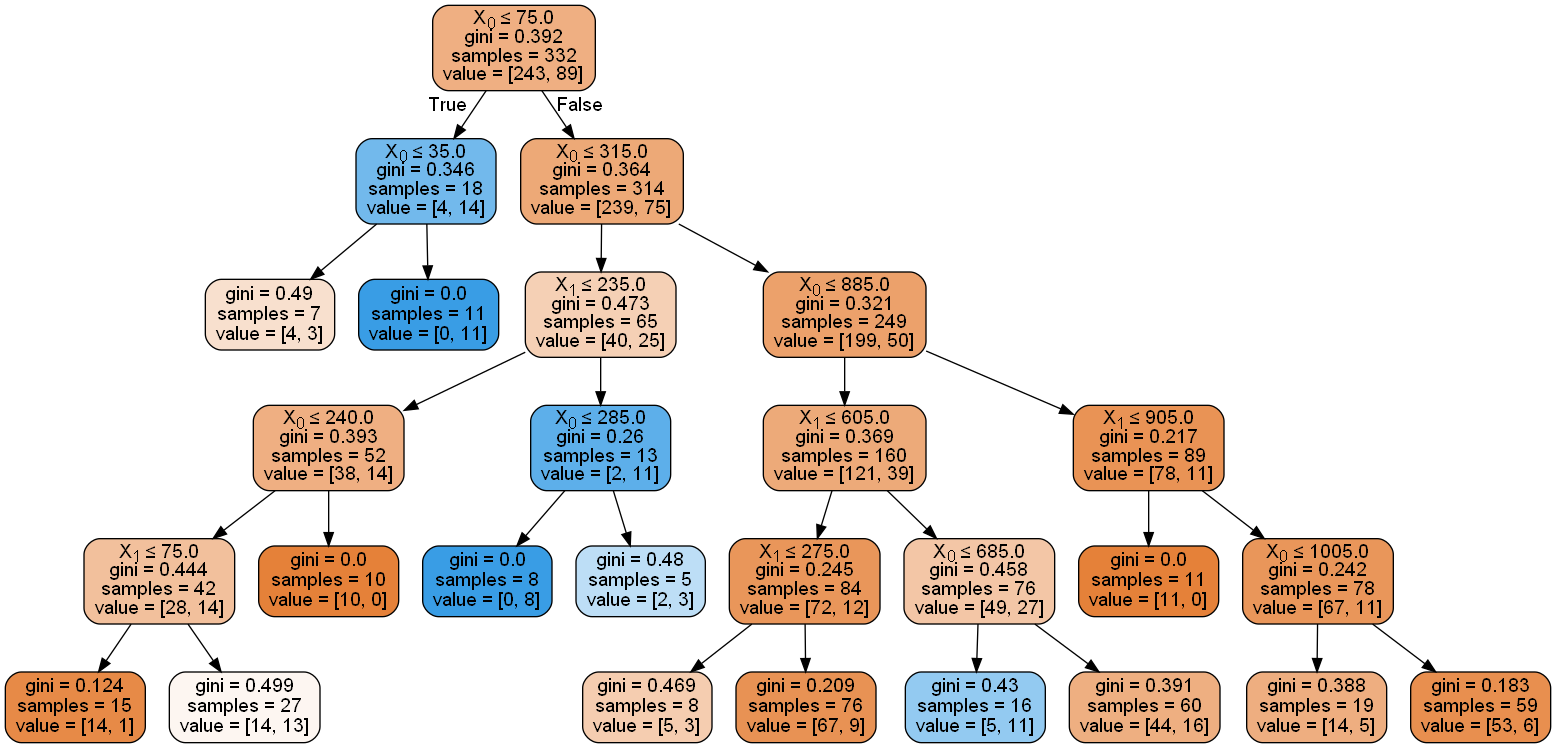

In [26]:
# from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_train_gini, out_file=dot_data,filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())